In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    import kid_readout
except ImportError:
    import sys
    sys.path.append('/home/gjones/kid_readout/')

In [3]:
import kid_readout.analysis.process_mmw_response
import kid_readout.utils.readoutnc
from kid_readout.analysis import resonator,khalil

no data directory set up for clouds defaulting to /data


In [4]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/artemis/readout/2015-12-20_093215_mmw_frequency_sweep_hittite_level_0.000_dBm.nc')

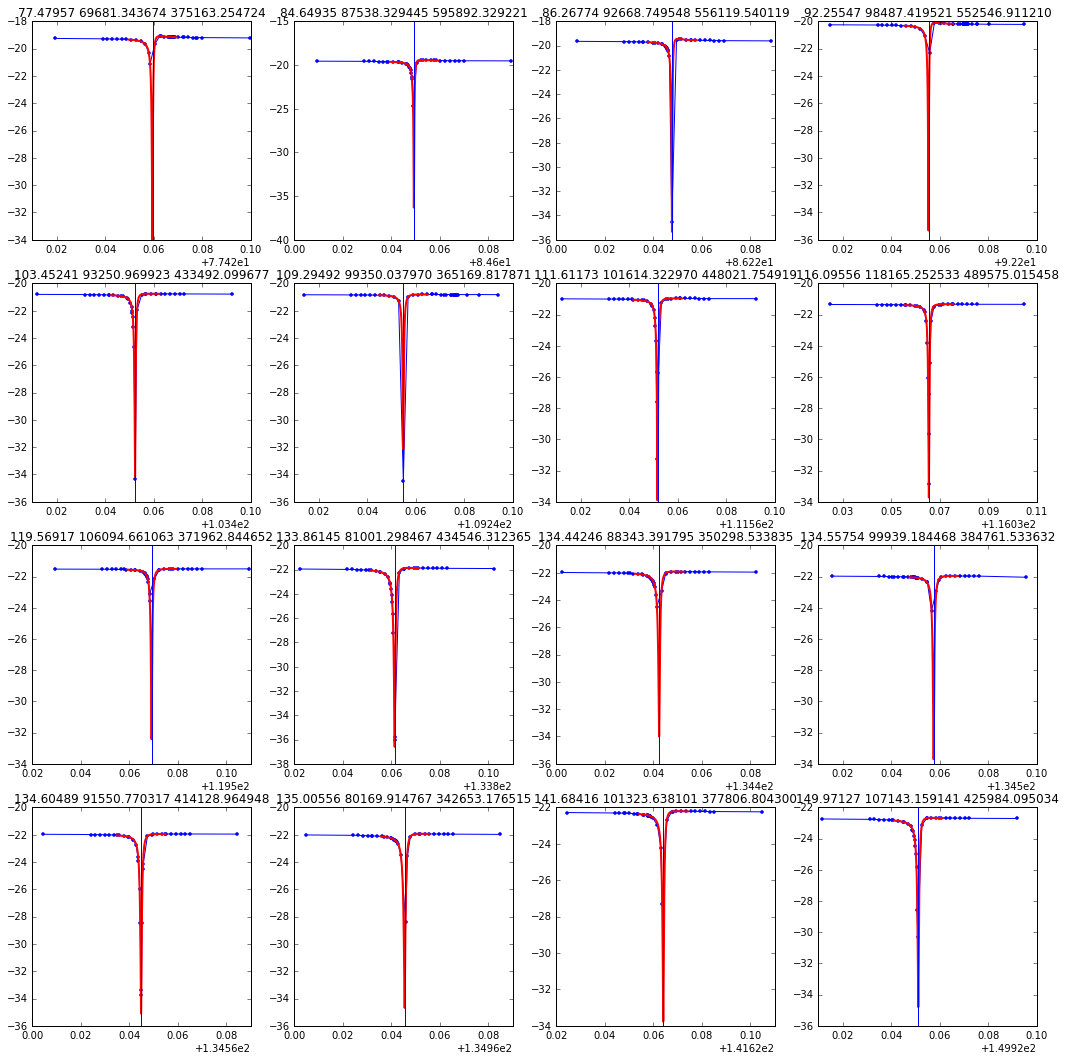

In [5]:
fig,axs = subplots(4,4,figsize=(18,18))
fits = []
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = rnc.sweeps[0].select_by_index(k)
    res = resonator.fit_best_resonator(fr,s21,errors=err,min_a=1,delay_estimate=-63.68)
    ax.plot(fr,20*np.log10(np.abs(s21)),'.-')
    fr2 = np.linspace(res.f_0-10e-3,res.f_0+10e-3,1000)
    ax.plot(fr2,20*np.log10(np.abs(res.model(x=fr2))),'r',lw=2)
    ax.set_title('%.5f %f %f' % (res.f_0,res.Q,res.Q_i))
    fits.append(res)
    ax.axvline(res.f_0)
    

In [6]:
ts = rnc.timestreams[0]

In [7]:
ts.epoch.shape[0]/16.

1.0

In [8]:
rnc.get_effective_dac_atten_at(rnc.sweeps[0].start_epoch)

(40.0, 62.04119982655925)

In [9]:
[rnc.get_effective_dac_atten_at(rnc.timestreams[k].epoch[0]) for k in range(len(rnc.timestreams))]

[(40.0, 62.04119982655925),
 (34.0, 56.04119982655925),
 (28.0, 50.04119982655925),
 (22.0, 44.04119982655925),
 (40.0, 62.04119982655925)]

In [10]:
ts.data_len_seconds[0]

33.554431999999998

In [11]:
ts = rnc.timestreams[4]

In [12]:
datetime.datetime.fromtimestamp(ts.epoch[-1])

datetime.datetime(2015, 12, 20, 9, 59, 22, 386922)

In [18]:
ts.epoch.shape

(1600,)

In [14]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2015-12-20_093215_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',k,timestream_group_index=4) for k in range(16)]

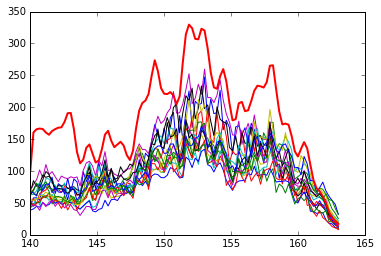

In [15]:
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response*1e6)
#ylim(0.5,2)
plot(mmw.mmw_freq/1e9,mmw.zbd_voltage*1e5,lw=2)

(0.02, 0.2)

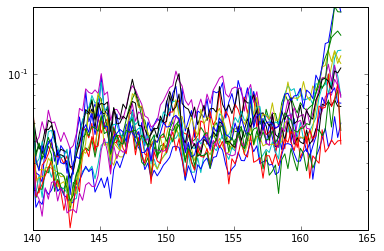

In [16]:
for mmw in mmws:
    semilogy(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmw.zbd_voltage)
ylim(.02,.2)
#plot(mmw.mmw_freq/1e9,mmw.zbd_voltage*1e5,lw=2)

In [17]:
import kid_readout.analysis.noise_measurement

updated file list


/home/gjones/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
snms = [kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/artemis/readout/2015-12-20_093215_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
                                                                  resonator_index=k,sweep_group_index=0,timestream_group_index=0,
                                                                  delay_estimate=-63.8) for k in range(16)]

In [19]:
snms = [kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/artemis/readout/2015-12-20_093215_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
                                                                  resonator_index=2,sweep_group_index=0,timestream_group_index=k,
                                                                  delay_estimate=-63.8) for k in range(4)]

/home/gjones/kid_readout/kid_readout/utils/parse_srs.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  df = read_table(fname,sep='[ ,]+',skiprows=1,converters={0:convtime},header=None)
/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]


using NFFT: 2** 16.0
10

/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]



using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10
using NFFT: 2** 16.0
10


/home/gjones/kid_readout/kid_readout/analysis/iqnoise.py:93: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


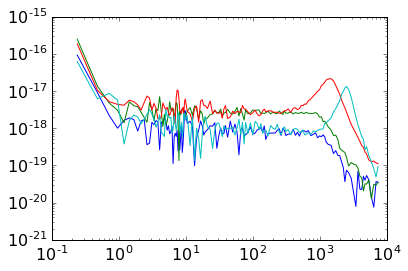

In [23]:
for snm in snms:
    loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:])

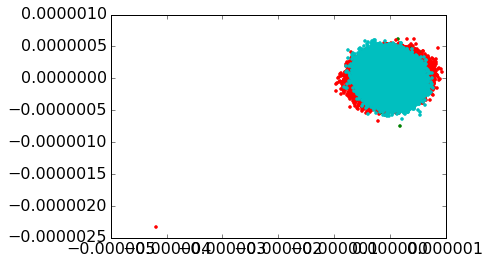

In [33]:
for snm in snms:
    plot(snm.fractional_fluctuation_timeseries.real,snm.fractional_fluctuation_timeseries.imag,'.')

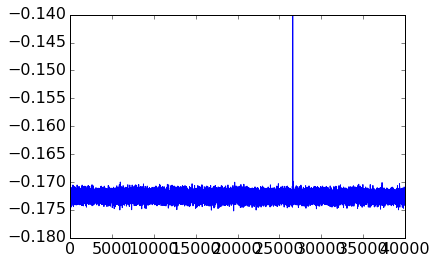

In [32]:
plot(snms[1].original_timeseries.imag[:40000])

In [ ]:
snm.fit_params['']

In [ ]:
figure(figsize=(18,12))
for snm in snms:
    if np.median(snm.pca_eigvals[0,:]) < 3e-18:
        loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:])
    print snm.fit_params['Q']
ylim(1e-20,1e-16)

In [ ]:
figure(figsize=(18,12))
for snm in snms:
    if np.median(snm.pca_eigvals[0,:]) < 3e-18:
#        loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:])
        loglog(snm.pca_freq,snm.pca_eigvals[1,:])
    print snm.fit_params['Q']
ylim(1e-19,1e-17)

In [ ]:
snm = snms[5]
blah = snm.plot()

In [ ]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    snm = snms[k]
    ax.loglog(snm.pca_freq,snm.pca_eigvals.T)

In [ ]:
snm = snms[12]

In [ ]:
plot(snm.original_timeseries.imag[:20000])

In [ ]:
plot(snm.original_timeseries.real,snm.original_timeseries.imag,'.')

In [ ]:
pxx,fr = mlab.psd(snm.fractional_fluctuation_timeseries.imag,NFFT=snm.fractional_fluctuation_timeseries.shape[0]//32,Fs=snm.timeseries_sample_rate)

In [ ]:
semilogy(fr,pxx)
#xlim(-10,10)
xscale('log')
ylim(1e-20,1e-16)
gca().axvline(1.4)

In [ ]:
reload(kid_readout.analysis.process_mmw_response)

In [ ]:
mmw = kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2015-12-20_101610_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',0,timestream_group_index=1)

In [ ]:
blah = mmw.plot()

In [ ]:
mmw = mmws[1]

In [ ]:
imshow(mmw.aligned_data.imag,aspect='auto')

In [ ]:
plot(mmw.normalized_high)
plot(mmw.normalized_low)

In [ ]:
import kid_readout.utils.starcryo_temps
reload(kid_readout.utils.starcryo_temps)

In [ ]:
import time

In [ ]:
kid_readout.utils.starcryo_temps.get_temperatures_at(time.time()-3600)

In [ ]:
import os

In [ ]:
os.path.exists('/artemis/readout')

In [ ]:
t,dat = kid_readout.utils.parse_srs.get_load_log('/artemis/readout/SRS/20151218-101312.txt')

In [ ]:
t.shape

In [ ]:
dat.shape

In [ ]:
dat[-2,13]

In [ ]:
dat[-2]

In [ ]:
import datetime

In [ ]:
plot(t,dat[:,11])
ylim(0,10)
fig = gcf()
fig.autofmt_xdate()
xlim(datetime.datetime(2015,12,19,9),datetime.datetime(2015,12,20))